### Pierre Koekemoer

#### `Advanced Classification Predict`

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Conclusion</a>

## Introduction:

#### Below are the steps that will be followed in solving the EDSA - Twitter Sentiment Classification problem

*Firstly a Exploratory Data Analysis (EDA) will be conducted* will look at various dimentions such as value counts the various dimensions and some visuals to better grasp how the data is structured
- EDA
    - Describe data
    - Value counts
    - Word Clouds

    
*Secondly we will proceed to data pre-processing*.This is a fundamental step in ensuring good model results. The steps that we will follow are listed below. 

- Pre Processing
    - Natural Language Processing (NLP)
    
        - Remove Noise, Punctuations, URLs, Email links and digits
        - Change all words to lower case strings
        - Remove Stopwords
        - Tokenization of sentences
        - Lematization of tokens
        - TFIDCountvectorizer to create features for our model
    -  Handeling Imbalaced data
        - To handel our imbalanced data we will use `SMOTE` (Synthetic Minority Oversampling Technique).
    - Create our X and Y varaiables
    
*Thridly we will build our models to predict a twitter users sentiment regrading climate change*. This will be done through creating a train test split, fitting the model and finally, making our predictions.

- Modeling
    - Train Test Split
    - Fit our model
    - Use GridSearchCV to find best hyperparameters
    - Make our prediction
    - Evaluate the accuracy of our model using sklearn's `classification_report`
    
    
- Conclusion
<a href=#eight>link to conclusion</a>


#### onthou om cell 10 en cell 13 te uncomment
        

<a id="one"></a>
 
 ### Imports
 
<a href=#cont>Back to Table of Contents</a>


In [54]:
# Pre-Processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob


#Class imbalancing libraries 
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

# NLP imports
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm

<a id="two"></a>
 
 ### Loading the Data
 
<a href=#cont>Back to Table of Contents</a>

In [2]:
train = pd.read_csv(fr"C:\Users\PierreK\Aramex_International_1\OneDrive - Aramex International\Pierre Desktop\EXPLORE DATA SCIENCE - studies\Explore Advanced Classification\Advanced Classification Predict Project\train.csv")
test = pd.read_csv(fr"C:\Users\PierreK\Aramex_International_1\OneDrive - Aramex International\Pierre Desktop\EXPLORE DATA SCIENCE - studies\Explore Advanced Classification\Advanced Classification Predict Project\test.csv")
sample = pd.read_csv(fr"C:\Users\PierreK\Aramex_International_1\OneDrive - Aramex International\Pierre Desktop\EXPLORE DATA SCIENCE - studies\Explore Advanced Classification\Advanced Classification Predict Project\sample_submission.csv")

In [3]:
train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [4]:
test.shape

(10546, 2)

In [5]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


In [6]:
sample.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


<a id="three"></a>
 
 ### Exploratory Data Analysis
 
<a href=#cont>Back to Table of Contents</a>

In [7]:
#descriptives
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0
tweetid,15819.0,501719.433656,289045.983132,6.0,253207.5,502291.0,753769.0,999888.0


In [8]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
tweetid,10546.0,496899.936943,288115.677148,231.0,246162.5,495923.0,742250.0,999983.0


In [9]:
#check for nulls
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [10]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Shape of your Data Set loaded: (15819, 3)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
tweetid,15819,int64,0,0.000000,100.000000,0,possible ID column: drop
message,14229,object,0,0.000000,89.948796,1,combine rare categories
sentiment,4,int64,0,0.000000,0.025286,0,


    3 Predictors classified...
        1 variables removed since they were ID or low-information variables
        List of variables removed: ['tweetid']


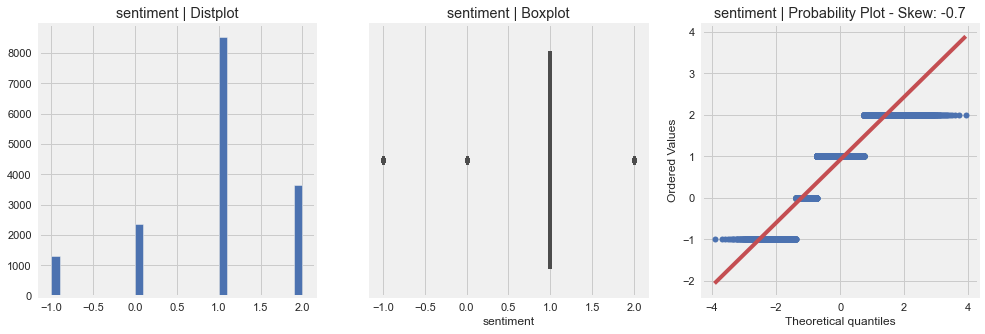

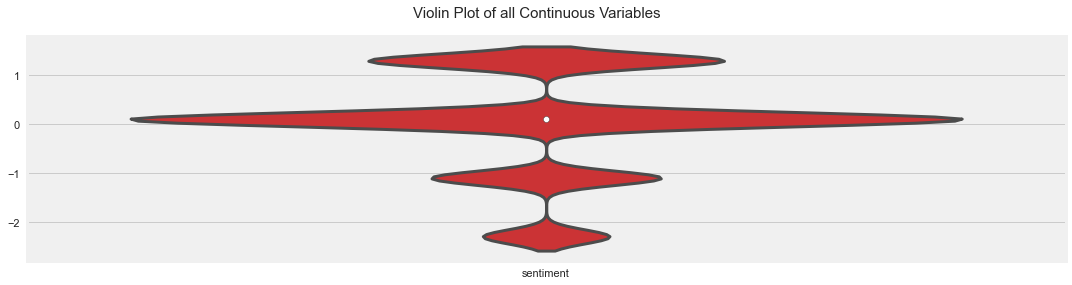

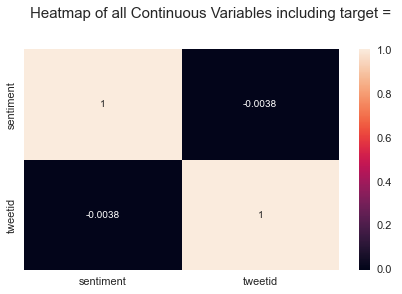

No categorical or numeric vars in data set. Hence no bar charts.


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\PierreK\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\PierreK\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\PierreK\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\PierreK\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\PierreK\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nlt

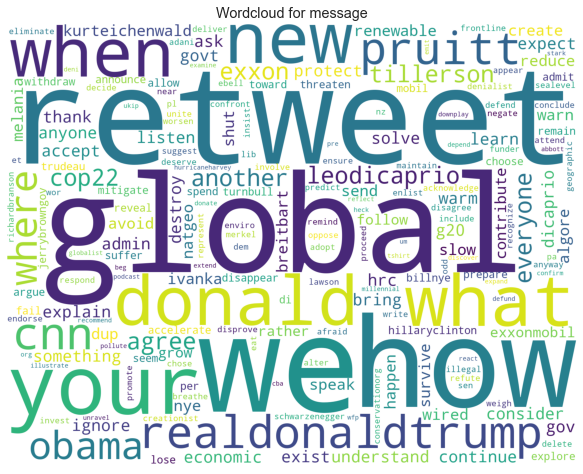

All Plots done
Time to run AutoViz = 12 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [57]:
#EDA Autoviz
autoviz = AutoViz_Class().AutoViz('train.csv')

<AxesSubplot:>

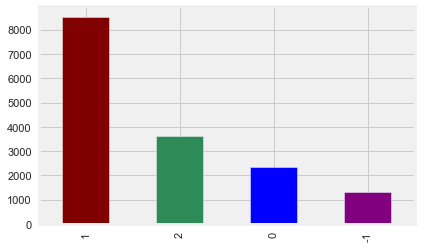

In [55]:
sentiment_val = train['sentiment'].value_counts()
sentiment_val.plot(kind = 'bar' , color = ['maroon','seagreen', 'blue', 'purple'])

In [13]:
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

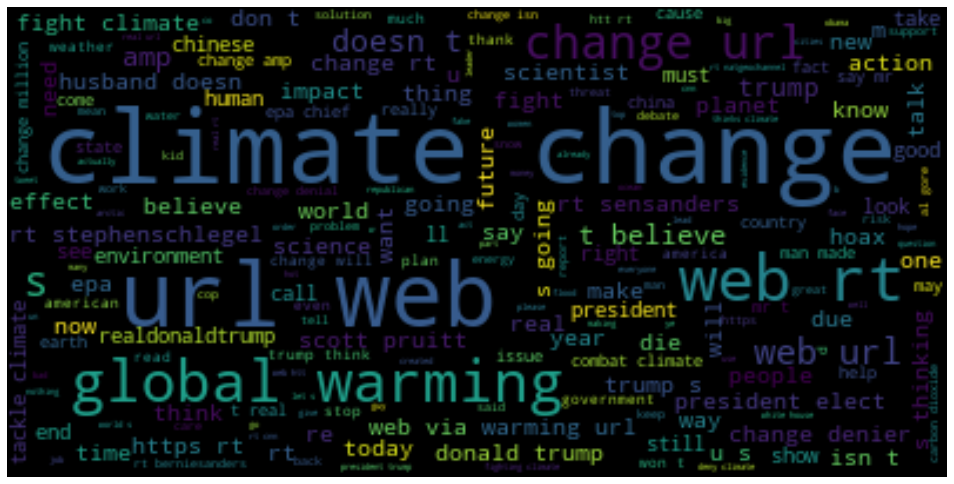

In [56]:
stopwords_cloud = set(STOPWORDS)
text = " ".join(str(i) for i in train.message)

wordcloud = WordCloud(stopwords=stopwords_cloud, background_color="black",    width=400,
    height=200,).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
type_labels = list(train.message.unique())
print(type_labels)

["PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable", "It's not like we lack evidence of anthropogenic global warming", 'RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…', '#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD', "RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight", "Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j", 'RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R', 'RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦', '@AceofSpadesHQ My 8yo 

<a id="four"></a>
 
 ### Data Engineering
 
<a href=#cont>Back to Table of Contents</a>

In [16]:
#URL Remover

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train['message'] = train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

test['message'] = test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [17]:
# Removing all special characters

train['message']  = train['message'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()
test['message'] = test['message'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

In [18]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn t think carbon dioxide is main cause of global warming and wait what url web via mashable,625221
1,1,It s not like we lack evidence of anthropogenic global warming,126103
2,2,RT RawStory Researchers say we have three years to act on climate change before it s too late url web url web,698562
3,1,TodayinMaker WIRED was a pivotal year in the war on climate change url web,573736
4,1,RT SoyNovioDeTodas It s and a racist sexist climate change denying bigot is leading in the polls ElectionNight,466954


In [19]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change url web,169760
1,Combine this with the polling of staffers re climate change and womens rights and you have a fascist state url web,35326
2,The scary unimpeachable evidence that climate change is already here url web itstimetochange climatechange ZEROCO,224985
3,Karoli morgfair OsborneInk dailykos Putin got to you too Jill Trump doesn t believe in climate change at all Thinks it s s hoax,476263
4,RT FakeWillMoore Female orgasms cause global warming Sarcastic Republican,872928


In [20]:
train['message'].iloc[105]

'RT  tristinc  our president think climate change is a hoax made by the chinese  amp  our vice president thinks being gay is a curable disease'

In [21]:
#string lower
train['message'] = train['message'].str.lower()
test['message'] = test['message'].str.lower()

#remove punctuation
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

train['message']= train['message'].apply(remove_punctuation)
train['message'].iloc[101]


test['message'] = test['message'].apply(remove_punctuation)

train['message'].iloc[101]

'rt  irisrimon  the chinese just broke massive iceberg in antarctica as part of their global warming hoax'

In [22]:
#tokenizer
tokeniser = TreebankWordTokenizer()
train['tokens'] = train['message'].apply(tokeniser.tokenize)


test['tokens'] = test['message'].apply(tokeniser.tokenize)

train.head()

,sentiment,message,tweetid,tokens
0,1,polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and wait what url web via mashable,625221,"[polyscimajor, epa, chief, doesn, t, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, url, web, via, mashable]"
1,1,it s not like we lack evidence of anthropogenic global warming,126103,"[it, s, not, like, we, lack, evidence, of, anthropogenic, global, warming]"
2,2,rt rawstory researchers say we have three years to act on climate change before it s too late url web url web,698562,"[rt, rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it, s, too, late, url, web, url, web]"
3,1,todayinmaker wired was a pivotal year in the war on climate change url web,573736,"[todayinmaker, wired, was, a, pivotal, year, in, the, war, on, climate, change, url, web]"
4,1,rt soynoviodetodas it s and a racist sexist climate change denying bigot is leading in the polls electionnight,466954,"[rt, soynoviodetodas, it, s, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]"


In [23]:
#my lemmatizer
lemmatizer = WordNetLemmatizer()

def tweet_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]  

train['lemma'] = train['tokens'].apply(tweet_lemma, args=(lemmatizer, ))
test['lemma'] = test['tokens'].apply(tweet_lemma, args=(lemmatizer, ))

In [24]:
train.head()

,sentiment,message,tweetid,tokens,lemma
0,1,polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming and wait what url web via mashable,625221,"[polyscimajor, epa, chief, doesn, t, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, url, web, via, mashable]","[polyscimajor, epa, chief, doesn, t, think, carbon, dioxide, is, main, cause, of, global, warming, and, wait, what, url, web, via, mashable]"
1,1,it s not like we lack evidence of anthropogenic global warming,126103,"[it, s, not, like, we, lack, evidence, of, anthropogenic, global, warming]","[it, s, not, like, we, lack, evidence, of, anthropogenic, global, warming]"
2,2,rt rawstory researchers say we have three years to act on climate change before it s too late url web url web,698562,"[rt, rawstory, researchers, say, we, have, three, years, to, act, on, climate, change, before, it, s, too, late, url, web, url, web]","[rt, rawstory, researcher, say, we, have, three, year, to, act, on, climate, change, before, it, s, too, late, url, web, url, web]"
3,1,todayinmaker wired was a pivotal year in the war on climate change url web,573736,"[todayinmaker, wired, was, a, pivotal, year, in, the, war, on, climate, change, url, web]","[todayinmaker, wired, wa, a, pivotal, year, in, the, war, on, climate, change, url, web]"
4,1,rt soynoviodetodas it s and a racist sexist climate change denying bigot is leading in the polls electionnight,466954,"[rt, soynoviodetodas, it, s, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, polls, electionnight]","[rt, soynoviodetodas, it, s, and, a, racist, sexist, climate, change, denying, bigot, is, leading, in, the, poll, electionnight]"


In [25]:
#Join the lemmatized list

def lemma_all(listing):
    return ' '.join(listing)
train['lemma'] = train['lemma'].apply(lemma_all)
test['lemma'] = test['lemma'].apply(lemma_all)

In [26]:
#TfidVecotrizer


tf_vect = TfidfVectorizer(stop_words='english',min_df = 3)

X_tf = tf_vect.fit_transform(train['lemma'])
X2_tf = tf_vect.transform(test['lemma'])

X_tf.toarray()
X2_tf.toarray()

tf_col = tf_vect.get_feature_names_out()

X_tf_df = pd.DataFrame(X_tf.toarray(), columns=[tf_col])
X2_tf_df = pd.DataFrame(X2_tf.toarray(), columns=[tf_col])

X_tf_df.head()
X2_tf_df.head()

,aaa,ab,abandon,abandoned,abandoning,abbott,abc,abcnews,abcpolitics,abcworldnews,...,zaman,zealand,zealot,zero,zeroco,zika,zimmer,zinke,zoe,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.511255,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [27]:
# Creating X and y 

X = X_tf_df
y = train[['sentiment']]


# Creating test X

X2 = X2_tf_df

X.shape

(15819, 5471)

#### class resampling using SMOTE

- SMOTE (Synthetic Minority Oversampling Technique) – Oversampling

In [28]:
su = SMOTE(random_state=42, k_neighbors = 2)

X_su,y_su = su.fit_resample(X,y)

In [29]:
y_su[['sentiment']]

,sentiment
0,1
1,1
2,2
3,1
4,1
...,...
34115,2
34116,2
34117,2
34118,2


 1    8530
 2    8530
 0    8530
-1    8530
Name: sentiment, dtype: int64


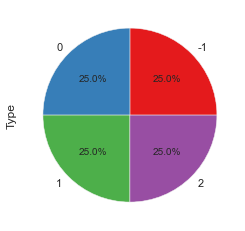

In [58]:
print(y_su["sentiment"].value_counts())

y_su.groupby('sentiment').size().plot(kind='pie',
                                       y = "sentiment",
                                       label = "Type",
                                       autopct='%1.1f%%')



y_su.groupby('sentiment')
plt.show()

<a id="five"></a>
 
 ### Modelling
 
<a href=#cont>Back to Table of Contents</a>

1. Naive Bayes
2. DecisionTree()
3. Random Forest Tree Classifier
4. SVC RBF
5. KNN
6. Extra Trees Regressor
7. LightGBM
8. Logistic Regression OVR Classifier

In [31]:
#Train Test Split

X1 = X_su

y1 = y_su

x_train,x_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [32]:
y1

,sentiment
0,1
1,1
2,2
3,1
4,1
...,...
34115,2
34116,2
34117,2
34118,2


1. **Naive Bayes**

In [33]:
nb = GaussianNB()
nb.fit(x_train,y_train)

y_nb = nb.predict(x_test)

In [34]:
# #gridsearch -- this cell is commented out due to time it takes to execute, to see the results please uncomment the cell

# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}


# my_grid = GridSearchCV(estimator=nb,param_grid=params_NB )
# my_grid.fit(x_train,y_train)

2. **Decision Tree**

In [35]:
decision_tree = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,)
decision_tree.fit(x_train,y_train)
y_dt = decision_tree.predict(x_test)

3. **Random Forest Tree Classifier**

In [36]:
rf = RandomForestClassifier(max_depth = 100,min_samples_split=4)
rf.fit(x_train,y_train)

y_rf = rf.predict(x_test)

In [37]:
#GridSearch -- -- this cell is commented out due to time it takes to execute, to see the results please uncomment the cell

# params = {'max_depth': [10,20,30,40,50,60,70,80,90,100],'n_estimators':[1,10,20,30,100],'max_features': ['auto', 'sqrt'],'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10] }

# clf = GridSearchCV(rf,params,cv = 5)
# clf.fit(x_train,y_train)
# print(clf.best_params_)

4. **SVC RBF**

In [38]:
svc = SVC(kernel='rbf',gamma = 2, C=1, max_iter = 10)
svc.fit(x_train,y_train)

y_svc = svc.predict(x_test)

5. **KNN**

In [39]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

y_knn = knn.predict(x_test)

6. **Extra Trees Classifier**

In [40]:
et = ExtraTreesClassifier(max_depth = 100, n_estimators = 150 ,min_samples_split=4)
et.fit(x_train,y_train)

y_et = et.predict(x_test)

7. **LightGBM**

In [41]:
lgm = lightgbm.LGBMClassifier(num_leaves= 200,max_depth=100,n_estimators = 100)#num_leaves=100,max_depth=100,n_estimators = 100,min_child_samples = 10,n_jobs=1

x_train.columns = x_train.columns.get_level_values(0)

lgm.fit(x_train,y_train)

y_lgm = lgm.predict(x_test)

8. **LogisticRegession**

In [42]:
lr = LogisticRegression(multi_class='ovr',C = 50.0)
                       
lr.fit(x_train,y_train)

y_lr = lr.predict(x_test)

<a id="six"></a>
 
 ### Model Performance
 
<a href=#cont>Back to Table of Contents</a>

1. Naive Bayes
2. DecisionTree()
3. Random Forest Tree Classifier
4. SVC RBF
5. KNN
6. Extra Trees Regressor
7. LightGBM
8. Logistic Regression OVR Classifier


In [43]:
#Classier report function

def class_report(y_true,y_pred):
    

    
    rep = metrics.classification_report(y_true,y_pred)
    
    return print(rep)


In [44]:
# Naive Bayes

class_report(y_test,y_nb)

              precision    recall  f1-score   support

          -1       0.63      1.00      0.77      1677
           0       0.77      0.71      0.74      1658
           1       0.89      0.46      0.61      1730
           2       0.81      0.81      0.81      1759

    accuracy                           0.74      6824
   macro avg       0.78      0.74      0.73      6824
weighted avg       0.78      0.74      0.73      6824



In [45]:
# Decsion Tree Classifier

class_report(y_test,y_dt)

              precision    recall  f1-score   support

          -1       0.85      0.83      0.84      1677
           0       0.75      0.75      0.75      1658
           1       0.69      0.71      0.70      1730
           2       0.81      0.81      0.81      1759

    accuracy                           0.78      6824
   macro avg       0.78      0.78      0.78      6824
weighted avg       0.78      0.78      0.78      6824



In [46]:
# Random Forest Classifier

class_report(y_test,y_rf)

              precision    recall  f1-score   support

          -1       0.96      0.91      0.94      1677
           0       0.86      0.84      0.85      1658
           1       0.81      0.75      0.78      1730
           2       0.81      0.92      0.86      1759

    accuracy                           0.86      6824
   macro avg       0.86      0.86      0.86      6824
weighted avg       0.86      0.86      0.86      6824



In [47]:
# Support Vector Classifier

class_report(y_test,y_svc)

              precision    recall  f1-score   support

          -1       0.24      0.98      0.39      1677
           0       0.55      0.02      0.05      1658
           1       1.00      0.00      0.00      1730
           2       0.30      0.00      0.01      1759

    accuracy                           0.25      6824
   macro avg       0.52      0.25      0.11      6824
weighted avg       0.52      0.25      0.11      6824



In [48]:
#K-Nearest Neighbours

class_report(y_test,y_knn)

              precision    recall  f1-score   support

          -1       0.71      0.98      0.82      1677
           0       0.62      0.90      0.74      1658
           1       0.98      0.16      0.27      1730
           2       0.81      0.85      0.83      1759

    accuracy                           0.72      6824
   macro avg       0.78      0.72      0.67      6824
weighted avg       0.78      0.72      0.66      6824



In [49]:
#Extra Trees Classifier

class_report(y_test,y_et)

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      1677
           0       0.86      0.89      0.87      1658
           1       0.89      0.72      0.79      1730
           2       0.80      0.95      0.87      1759

    accuracy                           0.87      6824
   macro avg       0.88      0.87      0.87      6824
weighted avg       0.88      0.87      0.87      6824



In [50]:
# LightGBM

class_report(y_test,y_lgm)

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95      1677
           0       0.89      0.87      0.88      1658
           1       0.80      0.82      0.81      1730
           2       0.90      0.91      0.90      1759

    accuracy                           0.89      6824
   macro avg       0.89      0.89      0.89      6824
weighted avg       0.89      0.89      0.89      6824



In [51]:
#Logistic Regression OVR

class_report(y_test,y_lr)

              precision    recall  f1-score   support

          -1       0.93      0.97      0.95      1677
           0       0.86      0.93      0.89      1658
           1       0.87      0.74      0.80      1730
           2       0.90      0.93      0.91      1759

    accuracy                           0.89      6824
   macro avg       0.89      0.89      0.89      6824
weighted avg       0.89      0.89      0.89      6824



<a id="seven"></a>
 
 ### Model Explanation
 
<a href=#cont>Back to Table of Contents</a>

1. **Model submission training and file**
2. **Model Explanation**


1. **Model submission training and file**

In [52]:
# Full model train LightGBM:

X1.columns = X1.columns.get_level_values(0)


lgm.fit(X1,y1)

y_lgbm = lgm.predict(X2)



In [53]:
#Model Submission

results = pd.DataFrame(y_lgbm , columns = ['sentiment'])
results['tweetid'] = test['tweetid']
results = results[['tweetid','sentiment']]
results.to_csv('my_classification_submission_lgbm.csv', index=False)

2. **Model Explanation**


<a id="eight"></a>
## Conclusion: Why the LightGBM was the best choice!

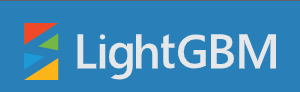




My Model of choice is the `Light Gradient Boosting Machine (LightGBM)` algorithm.

The `LightGBM` model was selected after testing various classification models on the Natural Language Processed twitter data regarding climate change. These models include Naive Bayes, Decision tree, Random Forest, SVC RBF, KNN, Extra Trees Classifier and a Logistic Regression OVR Classifier. 

Sklearn's classification_report was the criterion used to select the best model i.e., LightGBM, see model performance <a href=#six>. Model Performance</a>. Factors that were taken into consideration was, firstly how accurately the model of choice predicted each class in the given data using the f1 score, secondly how each model compared in terms of overall f1 score and finally how the model performed on the unseen data in the "EDSA Twitter Sentiment Classifaction" Kaggle competition. 

Conclusively LightGBM model was selected, I then proceeded with sklearn's GridsearchCV to find the best hyperparameters for the model to ensure the best possible results on the test data and future unseen data. 


***End***

<a href=#cont>Back to Table of Contents</a>
